# implementation of  neural network from scratch 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

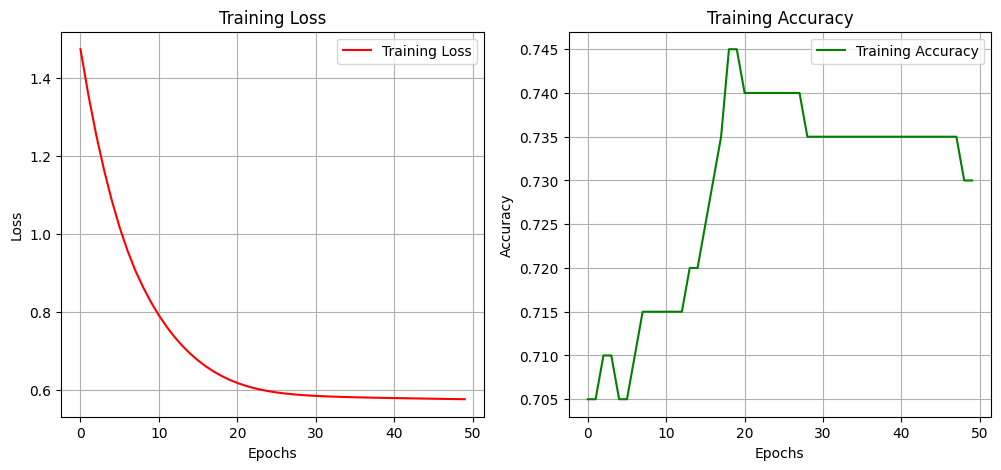

In [ ]:
#

#  Dataset 
X, y = make_classification(n_samples=200, n_features=3, n_informative=2,
                           n_redundant=0, random_state=42)
y = y.reshape(-1, 1)

#  Activations 
def sigmoid(z): return 1 / (1 + np.exp(-z))
def sigmoid_derivative(z): return sigmoid(z) * (1 - sigmoid(z))
def relu(z): return np.maximum(0, z)
def relu_derivative(z): return (z > 0).astype(float)

#  Initialize weights 
def initialize_weights_small():
    # Input layer = 3, Hidden1 = 3, Hidden2 = 2, Output = 1
    return {
        "W1": np.ones((3, 3)),  # 3 inputs -> 3 neurons
        "b1": np.zeros((1, 3)),

        "W2": np.ones((3, 2)),  # Hidden1 3 -> Hidden2 2 neurons
        "b2": np.zeros((1, 2)),

        "W3": np.ones((2, 1)),  # Hidden2 2 -> Output 1
        "b3": np.zeros((1, 1))
    }

#  Forward 
def forward_small(X, weights):
    Z1 = np.dot(X, weights["W1"]) + weights["b1"]; A1 = relu(Z1)
    Z2 = np.dot(A1, weights["W2"]) + weights["b2"]; A2 = relu(Z2)
    Z3 = np.dot(A2, weights["W3"]) + weights["b3"]; A3 = sigmoid(Z3)
    return A3, (Z1, A1, Z2, A2, Z3, A3)

#  Backward 
def backward_small(X, y, weights, cache):
    m = X.shape[0]
    Z1, A1, Z2, A2, Z3, A3 = cache

    dZ3 = A3 - y
    dW3 = (1/m) * np.dot(A2.T, dZ3); db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, weights["W3"].T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (1/m) * np.dot(A1.T, dZ2); db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, weights["W2"].T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(X.T, dZ1); db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

    return {"dW1": dW1, "db1": db1,
            "dW2": dW2, "db2": db2,
            "dW3": dW3, "db3": db3}

#  Update 
def update_small(weights, grads, lr=0.1):
    for i in range(1, 4):
        weights[f"W{i}"] -= lr * grads[f"dW{i}"]
        weights[f"b{i}"] -= lr * grads[f"db{i}"]
    return weights

#  Predict 
def predict_small(X, weights):
    A3, _ = forward_small(X, weights)
    return (A3 > 0.5).astype(int)

#  Training 
weights = initialize_weights_small()
epochs = 50

loss_list = []
accuracy_list = []

for epoch in range(epochs):
    # Forward + Loss
    A3, cache = forward_small(X, weights)
    loss = -(1/X.shape[0]) * np.sum(y*np.log(A3+1e-8) + (1-y)*np.log(1-A3+1e-8))
    loss_list.append(loss)

    # Accuracy
    y_pred = (A3 > 0.5).astype(int)
    acc = np.mean(y_pred == y)
    accuracy_list.append(acc)

    # Backward + Update
    grads = backward_small(X, y, weights, cache)
    weights = update_small(weights, grads, lr=0.1)

#  Plot Loss and Accuracy 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(epochs), loss_list, label="Training Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epochs), accuracy_list, label="Training Accuracy", color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.grid(True)
plt.legend()

plt.show()